Text(0, 0.5, 'Latitude')

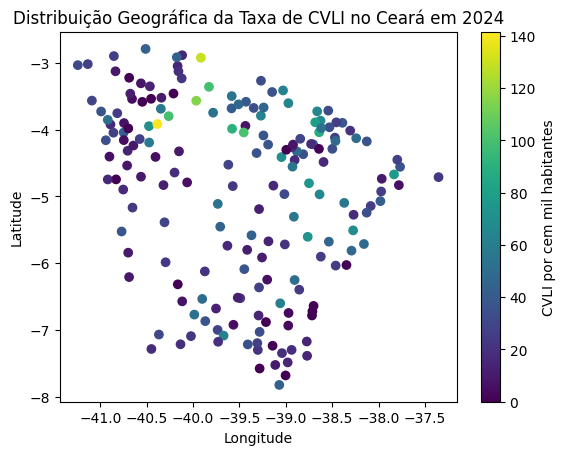

In [1]:
!pip install pdfplumber
import io, matplotlib, pandas, pdfplumber, urllib
url_ibge = 'https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2024/e'
url_ibge += 'stimativa_dou_2024.pdf'
url_sspds = 'https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2025/03/CV'
url_sspds += 'LI_2009-2024.xlsx'
url_geo = 'https://raw.githubusercontent.com/kelvins/municipios-brasileiros/mai'
url_geo += 'n/csv/municipios.csv'
dados_ibge = urllib.request.urlopen(url_ibge)
dados_ibge = dados_ibge.read()
dados_ibge = io.BytesIO(dados_ibge)
dados_ibge = pdfplumber.open(dados_ibge)
colunas_ibge = dados_ibge.pages[2].extract_table()[0]
v0 = []
for v1 in range(1, 118): v0 += dados_ibge.pages[v1].extract_table()[1:]
dados_ibge = pandas.DataFrame(v0[1:-3], columns = colunas_ibge)
dados_ibge_ce = dados_ibge[dados_ibge['UF'] == 'CE']
dados_sspds = pandas.read_excel(url_sspds)
dados_geo = pandas.read_csv(url_geo)
cvli_2024 = []
for v2 in range(len(dados_sspds)):
    if '2024' in str(dados_sspds.iloc[v2]['Data']):
        cvli_2024.append(dados_sspds.iloc[v2])
cvli_2024 = pandas.DataFrame(cvli_2024)
principal = []
for v3 in dados_ibge_ce['NOME DO MUNICÍPIO']:
    principal.append([v3, len(cvli_2024[cvli_2024['Município'] == v3])])
principal = pandas.DataFrame(principal, columns = ['Município', 'CVLI'])
v4 = dados_ibge_ce['POPULAÇÃO ESTIMADA']
principal['População'] = [int(v5.replace('.','')) for v5 in v4]
principal['Taxa'] = principal['CVLI'] / principal['População'] * 100000
dados_geo_ce = dados_geo[dados_geo['codigo_uf'] == 23]
principal['Latitude'] = list(dados_geo_ce['latitude'])
principal['Longitude'] = list(dados_geo_ce['longitude'])
v5 = principal['Longitude']
v6 = principal['Latitude']
v7 = principal['Taxa']
v8 = 'Distribuição Geográfica da Taxa de CVLI no Ceará em 2024'
matplotlib.pyplot.scatter(v5, v6, c = v7)
matplotlib.pyplot.colorbar(label = 'CVLI por cem mil habitantes')
matplotlib.pyplot.title(v8)
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.ylabel('Latitude')

In [2]:
principal.sort_values(by = 'Taxa', ascending = False).head(10)

,Município,CVLI,População,Taxa,Latitude,Longitude
65,Groaíras,16,11313,141.430213,-3.91787,-40.3852
89,Itarema,59,45465,129.770153,-2.92480,-39.9167
112,Miraíma,17,14736,115.363735,-3.56867,-39.9663
61,General Sampaio,7,6924,101.097631,-4.04351,-39.4540
57,Forquilha,25,25127,99.494568,-3.79945,-40.2634
8,Amontada,44,44342,99.228722,-3.36017,-39.8288
172,Tejuçuoca,16,17626,90.774991,-3.98831,-39.5799
66,Guaiúba,22,25085,87.701814,-4.04057,-38.6404
104,Maranguape,85,108937,78.026749,-3.89143,-38.6829
84,Itaiçaba,6,7779,77.130737,-4.67146,-37.8330


In [3]:
principal.sort_values(by = 'Taxa', ascending = True).head(10)

,Município,CVLI,População,Taxa,Latitude,Longitude
5,Alcântaras,0,11754,0.0,-3.58537,-40.5479
14,Ararendá,0,11485,0.0,-4.74567,-40.8310
20,Baixio,0,5832,0.0,-6.71945,-38.7134
17,Arneiroz,0,7619,0.0,-6.31650,-40.1653
23,Barreira,0,23351,0.0,-4.28921,-38.6429
54,Ereré,0,6393,0.0,-6.02751,-38.3461
79,Ipaumirim,0,12441,0.0,-6.78265,-38.7179
64,Granjeiro,0,4960,0.0,-6.88134,-39.2144
96,Jati,0,8100,0.0,-7.67970,-39.0029
106,Martinópole,0,11232,0.0,-3.22520,-40.6896
